# Project Objective:
build a series of scatter plots to showcase the following relationships via random cities/geo-coords:

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import urllib
import api_keys
import time
from citipy import citipy
import warnings
warnings.filterwarnings('ignore')
# previously created csv file
csv_path = 'output_data/cities_v2.csv'
print("Review results on csv file with path: " + csv_path)

Review results on csv file with path: output_data/cities_v2.csv


# numpy module to generate random lat/long pairs

In [133]:
# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
rand_lats = list(np.random.uniform(high =-90.00, low=90.00, size=1500))
rand_longs = list(np.random.uniform(high =-90.00, low=90.00, size=1500))
print("Test Size: "+str(len(rand_lats))+" latitudes and " + str(len(rand_longs)) + " longitudes generated...")

Test Size: 1500 latitudes and 1500 longitudes generated...


# citipy module to pull nearest city name by lat/long

In [134]:
rand_city = []
for lat, long in zip(rand_lats, rand_longs):
    city = citipy.nearest_city(lat,long).city_name
#     print("(lat: %s, long: %s) -> %s"  %(lat,long,city))
    if city not in rand_city:
            rand_city.append(city)
len_rand_city = len(rand_city)
print("Total of %s random cities retrived via random lat/long pairs" %(len_rand_city))
print("First five random and unique cities: ")
print(rand_city[0:5])

Total of 633 random cities retrived via random lat/long pairs
First five random and unique cities: 
['nalut', 'lahij', 'richards bay', 'douentza', 'taolanaro']


In [135]:
# Print the city count to confirm sufficient count
city_count = len(rand_city)
if city_count >=500:
    print(str(city_count) + " cities: sufficient")
else:
        print(str(city_count) + " cities randomly generated: insufficient...\n\t*** Test run only! ***")

633 cities: sufficient


# perform a weather check on each of the cities using a series of successive API calls.

In [137]:
# OW api key imported from api.py module created for this purpose within the same folder of JNbk
api_key = api_keys.api_key
# base url that will be used during the iteration by adding city at the end
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_data=[]
# Include a print log of each city as it's being processed with the city number and city name:

In [138]:
print("---------Processing: Real-Time Weather Data %s ---------" % time.strftime("%x"))
for city in rand_city:
    print("City weather records: requesting %s of %s | %s" % (rand_city.index(city)+1, city_count+1, city))
# urllib for city names with multiple words/parsing error: mayor pablo lagerenza/ mayor%20pablo%20lagerenza
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    print(city_url)
    try:
        openweather= requests.get(city_url).json()
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": openweather["coord"]["lat"], 
                          "Lng": openweather["coord"]["lon"],
                          "Max Temp": openweather["main"]["temp_max"],
                          "Humidity": openweather["main"]["humidity"],
                          "Cloudiness": openweather["clouds"]["all"],
                          "Wind Speed": openweather["wind"]["speed"],
                          "Country": openweather["sys"]["country"],
                          "Date": openweather["dt"]})
    # If an error is experienced, skip the city
    except:
        print("No records returned from request")
        pass

print("---------Completed: Real-Time Weather Data %s ---------" % time.strftime("%x"))


---------Processing: Real-Time Weather Data 10/05/18 ---------
City weather records: requesting 1 of 634 | nalut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=nalut
City weather records: requesting 2 of 634 | lahij
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=lahij
City weather records: requesting 3 of 634 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=richards%20bay
City weather records: requesting 4 of 634 | douentza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=douentza
City weather records: requesting 5 of 634 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=taolanaro
No records returned from request
City weather records: requesting 6 of 634 | bandarbeyla
http://api.openweatherm

City weather records: requesting 49 of 634 | orekhovo-zuevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=orekhovo-zuevo
City weather records: requesting 50 of 634 | marzuq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=marzuq
City weather records: requesting 51 of 634 | muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=muros
City weather records: requesting 52 of 634 | oussouye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=oussouye
City weather records: requesting 53 of 634 | ati
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=ati
City weather records: requesting 54 of 634 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=kruisfontein
City

City weather records: requesting 98 of 634 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=plettenberg%20bay
City weather records: requesting 99 of 634 | saint-georges
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=saint-georges
City weather records: requesting 100 of 634 | notse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=notse
City weather records: requesting 101 of 634 | bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=bilma
City weather records: requesting 102 of 634 | cap malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=cap%20malheureux
City weather records: requesting 103 of 634 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb05

City weather records: requesting 148 of 634 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=klaksvik
City weather records: requesting 149 of 634 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=saint-augustin
City weather records: requesting 150 of 634 | bjala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=bjala
No records returned from request
City weather records: requesting 151 of 634 | paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=paita
City weather records: requesting 152 of 634 | jacareacanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=jacareacanga
City weather records: requesting 153 of 634 | mecca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5

City weather records: requesting 197 of 634 | sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=sinnamary
City weather records: requesting 198 of 634 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=attawapiskat
No records returned from request
City weather records: requesting 199 of 634 | katsiveli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=katsiveli
No records returned from request
City weather records: requesting 200 of 634 | kizema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=kizema
City weather records: requesting 201 of 634 | farcasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=farcasa
City weather records: requesting 202 of 634 | saint-leu
http://api.openweathermap.org/data/2.

City weather records: requesting 245 of 634 | dubreka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=dubreka
City weather records: requesting 246 of 634 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=sorland
City weather records: requesting 247 of 634 | manicaragua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=manicaragua
City weather records: requesting 248 of 634 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=amderma
No records returned from request
City weather records: requesting 249 of 634 | herat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=herat
City weather records: requesting 250 of 634 | mangrol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c85419

City weather records: requesting 293 of 634 | awjilah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=awjilah
City weather records: requesting 294 of 634 | baksanenok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=baksanenok
City weather records: requesting 295 of 634 | ambodifototra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=ambodifototra
No records returned from request
City weather records: requesting 296 of 634 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=tumannyy
No records returned from request
City weather records: requesting 297 of 634 | liseleje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=liseleje
City weather records: requesting 298 of 634 | honningsvag
http://api.openweathermap.org

City weather records: requesting 341 of 634 | darnah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=darnah
City weather records: requesting 342 of 634 | bayji
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=bayji
City weather records: requesting 343 of 634 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=saint-joseph
City weather records: requesting 344 of 634 | puerto cabezas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=puerto%20cabezas
City weather records: requesting 345 of 634 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=pangnirtung
City weather records: requesting 346 of 634 | lexington park
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194c

City weather records: requesting 390 of 634 | sorkjosen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=sorkjosen
No records returned from request
City weather records: requesting 391 of 634 | bull savanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=bull%20savanna
City weather records: requesting 392 of 634 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=rio%20gallegos
City weather records: requesting 393 of 634 | urengoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=urengoy
City weather records: requesting 394 of 634 | bahir dar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=bahir%20dar
City weather records: requesting 395 of 634 | oskarshamn
http://api.openweathermap.org/data/2.5/weather?unit

City weather records: requesting 438 of 634 | kuhdasht
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=kuhdasht
City weather records: requesting 439 of 634 | ponta pora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=ponta%20pora
City weather records: requesting 440 of 634 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=sao%20joao%20da%20barra
City weather records: requesting 441 of 634 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=namibe
City weather records: requesting 442 of 634 | mezen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=mezen
City weather records: requesting 443 of 634 | rehoboth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb053

No records returned from request
City weather records: requesting 486 of 634 | fuerte olimpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=fuerte%20olimpo
City weather records: requesting 487 of 634 | dzhusaly
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=dzhusaly
No records returned from request
City weather records: requesting 488 of 634 | kolpashevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=kolpashevo
City weather records: requesting 489 of 634 | brokopondo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=brokopondo
City weather records: requesting 490 of 634 | saint-francois
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=saint-francois
City weather records: requesting 491 of 634 | gayny
http://api.open

City weather records: requesting 533 of 634 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=taoudenni
City weather records: requesting 534 of 634 | ngaoundere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=ngaoundere
City weather records: requesting 535 of 634 | palm coast
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=palm%20coast
City weather records: requesting 536 of 634 | moyobamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=moyobamba
City weather records: requesting 537 of 634 | nunspeet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=nunspeet
City weather records: requesting 538 of 634 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a8

City weather records: requesting 581 of 634 | teguldet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=teguldet
City weather records: requesting 582 of 634 | shchelyayur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=shchelyayur
No records returned from request
City weather records: requesting 583 of 634 | japura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=japura
City weather records: requesting 584 of 634 | kirovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=kirovskiy
City weather records: requesting 585 of 634 | guasdualito
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=guasdualito
City weather records: requesting 586 of 634 | santa isabel do rio negro
http://api.openweathermap.org/data/2.5/weather?uni

City weather records: requesting 629 of 634 | lure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=lure
City weather records: requesting 630 of 634 | bocaranga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=bocaranga
No records returned from request
City weather records: requesting 631 of 634 | storforshei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=storforshei
City weather records: requesting 632 of 634 | ust-koksa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=ust-koksa
City weather records: requesting 633 of 634 | arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=42a5a7b661c854194cb0539e5fd1a86f&q=arlit
---------Completed: Real-Time Weather Data 10/05/18 ---------


In [142]:
# Convert array of JSONs into Pandas DataFrame
mastercity_df = pd.DataFrame(city_data)
mastercity_df.head()
mastercity_df.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

In [60]:
# Save both a CSV of all data retrieved and png images for each scatter plot.
mastercity_df.to_csv(csv_path, index_label="City_ID")

In [147]:
# confirm unique cities for city record count
final_citycount = len(mastercity_df['City'])
print("Completed records for %s out of %s randomly generated cities: sufficient" %(final_citycount,len(rand_city)))
if record_count < 500:
    print('\ninsufficient...\n\t*** Test run? ***')

Completed records for 557 out of 633 randomly generated cities: sufficient


# build a series of scatter plots for following
[1] Temperature (F) [2] Humidity (%) [3] Cloudiness (%) [4] Wind Speed (mph) vs. Latitude

In [148]:
# copy dataframe with four columns required for plot iteration 
renamedforplot_df = mastercity_df.filter(['Max Temp','Humidity', 'Cloudiness', 'Wind Speed'], axis=1)
# rename columns of above created dataframe per assignment instructions
renamedforplot_df = renamedforplot_df.rename(columns={ 'Max Temp':'Temperature (F)',
                                   'Humidity': ' Humidity (%)',
                                   'Cloudiness': 'Cloudiness (%)',
                                   'Wind Speed': 'Wind Speed (mph)'})
# create a color list for iteration creating plots
color_list = ['b',  'c', 'm', 'y']
size = 100

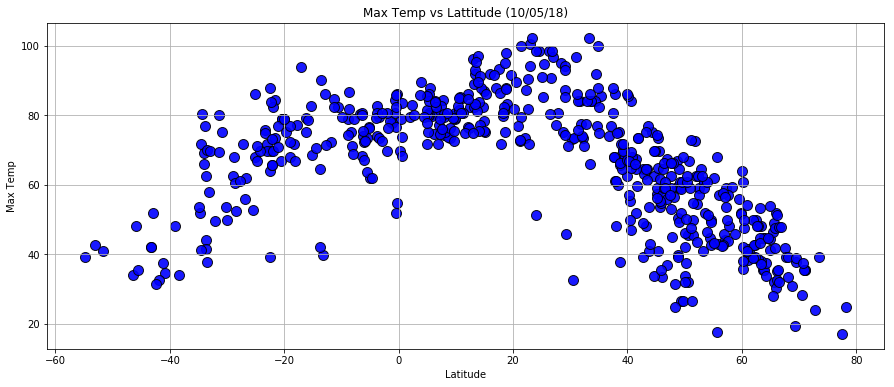

	* Max Temp vs Lat. saved as ...output_data/Lattitude_vs_Max Temp.png




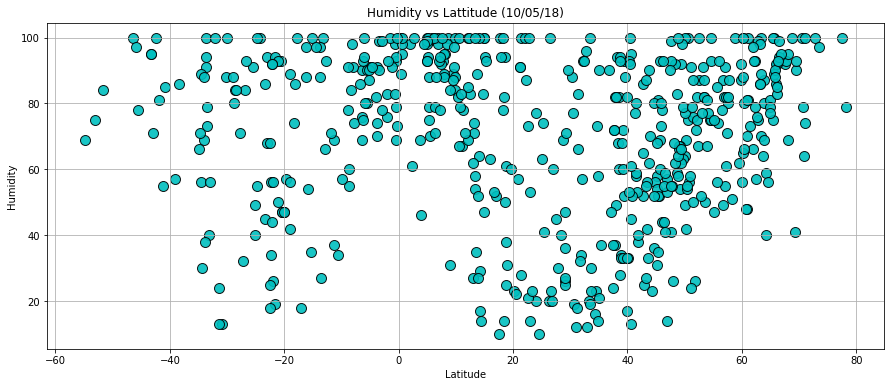

	* Humidity vs Lat. saved as ...output_data/Lattitude_vs_Humidity.png




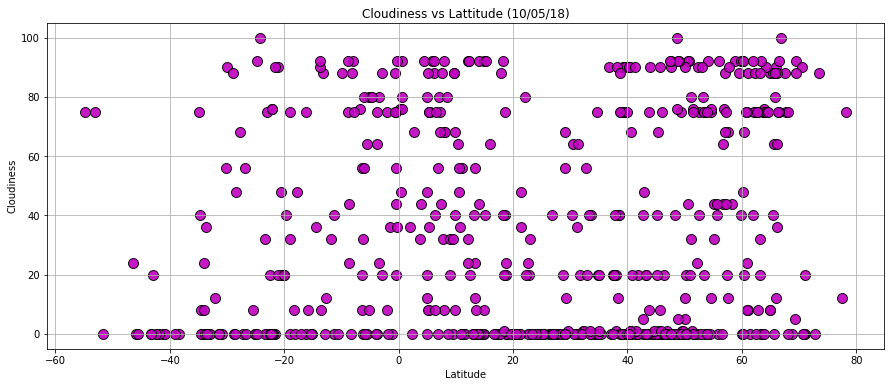

	* Cloudiness vs Lat. saved as ...output_data/Lattitude_vs_Cloudiness.png




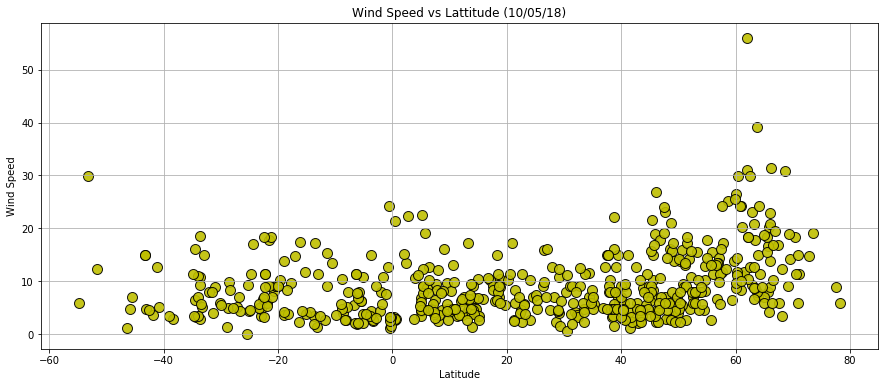

	* Wind Speed vs Lat. saved as ...output_data/Lattitude_vs_Wind Speed.png




In [149]:
# scatter plots with todays date, then save on output_data output_data folder and print messages along 
for axis, color in zip(ax_list,color_list):
        plt.figure(figsize=(15,6))
        plt.title(axis + " vs Lattitude (%s)" % time.strftime("%x"))
        plt.scatter(mastercity_df['Lat'], mastercity_df[axis],s=size, marker="o", facecolors= color, edgecolors="black", alpha=0.90)
        plt.xlabel('Latitude')
        plt.ylabel(axis)
        plt.grid()
        plt.savefig('output_data/v2_Lattitude_vs_'+axis)
        plt.show()
        print("\t* " + axis + " vs Lat. saved as ..."+'output_data/Lattitude_vs_'+axis+".png")
        print("\n")
        